In [ ]:
#ALI JAWED DELAWARI GH1024093

https://github.com/alijaweddelawari/B104BR/tree/main?search=1


#Title: Predicting Startup Success Using Machine Learning
#Introduction

#Startups are an integral part of our modern economy driving innovation and creating employment for us. Howevr many startups fail to scale due to various factors, such as inadequate funding, poor market positioning, or mismanagement of thier resources. Predicting the likelihood of startup success has become a critical task for stakeholders which includes investors and entrepreneurs.

#This project mainly focuses on building a machine learning pipeline to predict startup success using the 50_Startups.csv dataset in hand. The dataset contains information about startups including their overall investment levels, operational costs, and marketing expences. By leveraging data driven insights the project aims to develop a effective predictive model that can aid in decision making processes for both startups existing and new startups.

#Key objectives include:

#Exploring and preprocessing all the dataset to ensure data quality.
#Engineering overall features to enhance model performance.
#Training and evaluating machine learning models to identify the best approach for the essay.
#Visualizing all the results and discussing all the implications of the findings.


In [ ]:
#Data Exploration and Visualization

#To begin exploring and visulizing the dataset we will systematically analyze the structure, distribution, and relationships between the features  and the target variable. This step will provide insights to inform preprocessing and modeling decisions.
#We will performe an in depth exploration of the dataset. Initially, we checked for missing values and duplicates, confirming that the dataset is complete and free of redundancy.These insights set the stage for effective preprocessing and modeling in subsequent steps.

In [60]:

#necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset:Loads the dataset into a DataFrame.
data = pd.read_csv('50_Startups.csv')

# Display the first few rows:Displays the first five rows of the dataset to understand its structure.
print(data.head())

#basic info:Provides a summary, including data types and non null counts to check for missing values.
print(data.info())


   R&D Spend  Administration  Marketing Spend       State     Profit
0  165349.20       136897.80        471784.10    New York  192261.83
1  162597.70       151377.59        443898.53  California  191792.06
2  153441.51       101145.55        407934.54     Florida  191050.39
3  144372.41       118671.85        383199.62    New York  182901.99
4  142107.34        91391.77        366168.42     Florida  166187.94
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB
None


In [61]:
# Checking for missing values:finds if any column has missing values.
print("Missing values per column:\n", data.isnull().sum())

# Checking for duplicates:Counts the number of duplicate rows.
print("Number of duplicate rows:", data.duplicated().sum())


Missing values per column:
 R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64
Number of duplicate rows: 0


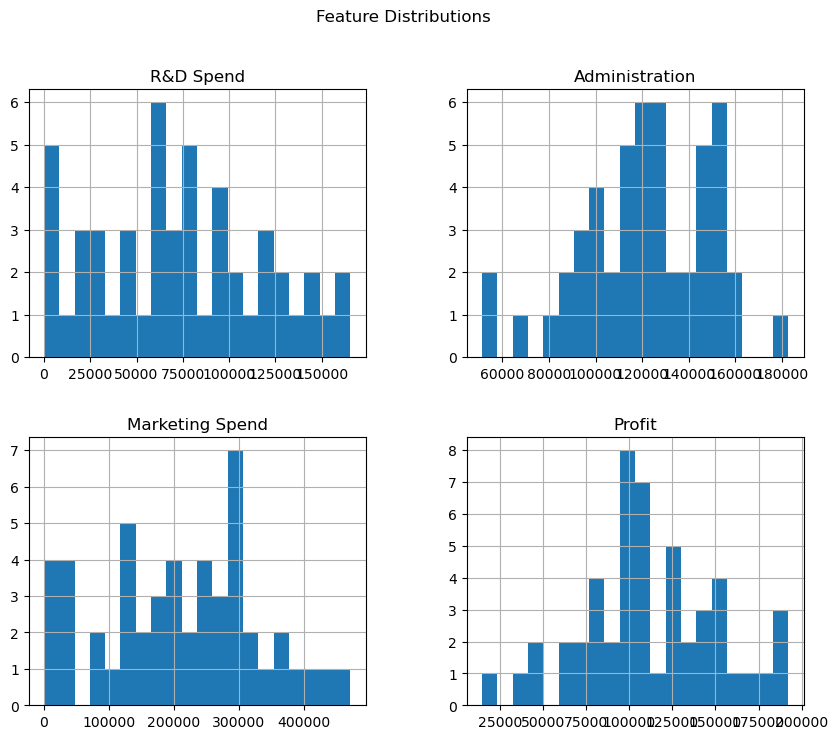

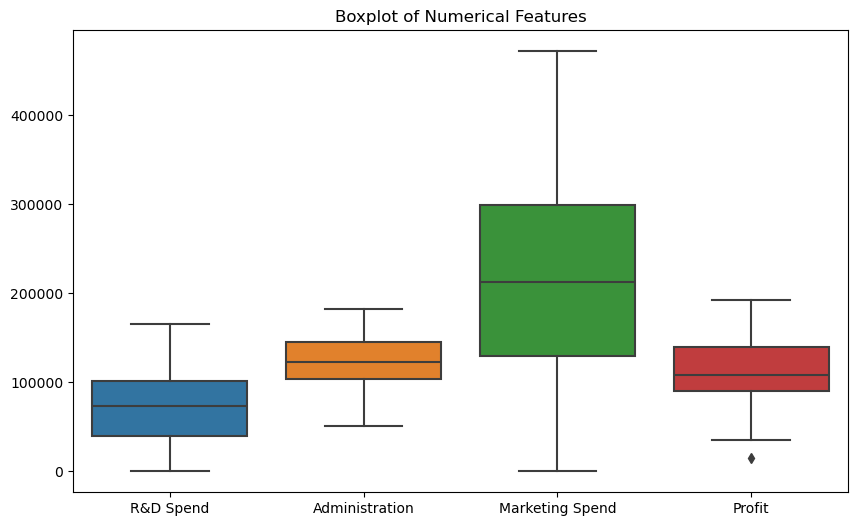

In [62]:
# Numerical feature histograms:Creates histograms for all the numerical features to visualize distributions.
data.hist(bins=20, figsize=(10, 8))
plt.suptitle("Feature Distributions")
plt.show()

#Boxplot for numerical features:below displays boxplots for numerical features to identify outliers.
plt.figure(figsize=(10, 6))
sns.boxplot(data=data[['R&D Spend', 'Administration', 'Marketing Spend', 'Profit']])
plt.title("Boxplot of Numerical Features")
plt.show()


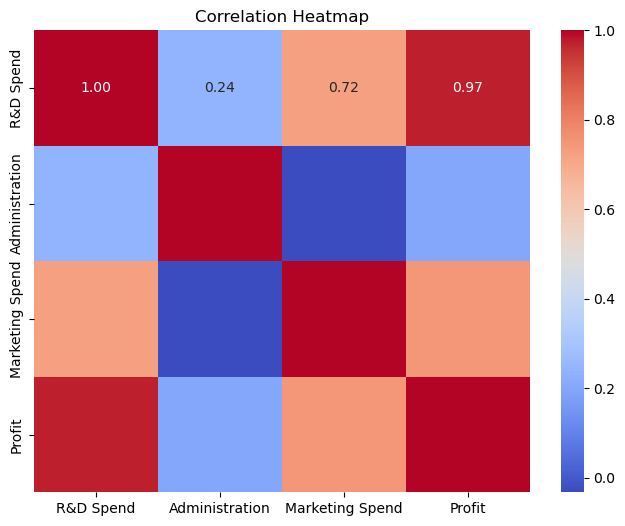

In [63]:
# code for selecting only numeric columns for correlation. it selects only numeric columns (float64 or int64) for correlation analysis excluding the categorical column state.
numeric_data = data.select_dtypes(include=['float64', 'int64'])

#correlation heatmap:Visualizes correlations between all numerical features in the dataset helping identify multicollinearity.
plt.figure(figsize=(8, 6))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()


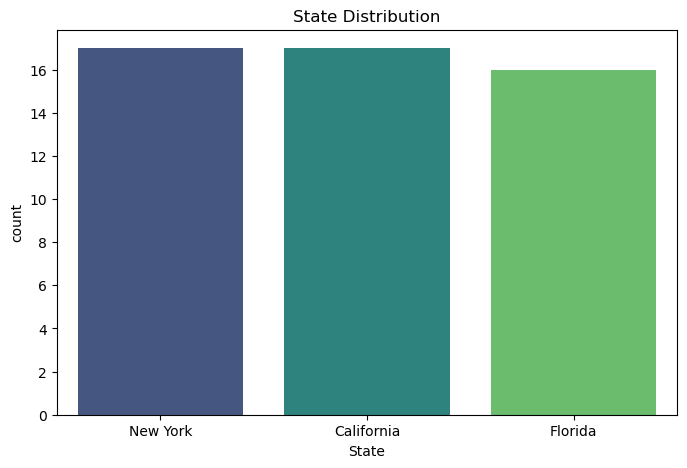

In [64]:
#bar chart for state:below code creates a bar chart showing the frequency of each state.
plt.figure(figsize=(8, 5))
sns.countplot(x='State', data=data, palette='viridis')
plt.title("State Distribution")
plt.show()


In [ ]:
#Data Preprocessing and Feature Engineering
#in this step we will prepared the dataset for machine learning procces by addressing missing values and duplicates to ensure data consistance and complete. We will encode categorical variables using Sklearn's Onehotencoder within a columntransformer and we will standardized numerical features using standardscaler. The dataset will be split into training, validation, and test sets in a 70% 15% 15% ratio to support model evaluation. This preprocessing usaully  ensures that the data is clean and avoids data leakage setting the final stage for effective model training.


In [38]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split

#ColumnTransformer: Applies transformations to specific columns.
#OneHotEncoder: Encodes categorical variables.
#StandardScaler: Standardizes numerical features.
#train_test_split: Splits the dataset into training, validation, and test sets.

In [39]:
# Define column names:
#categorical_features: specifies the categorical column s for encoding.
#numerical_features: specifies numerical columns for scaling.

categorical_features = ['State']
numerical_features = ['R&D Spend', 'Administration', 'Marketing Spend']

# Column transformer for feature encoding and scaling:Combines onehotencoder here for categorical variables and also standardscaler for numerical variables.

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_features),  # One-hot encode categorical columns
        ('num', StandardScaler(), numerical_features)   # Scale numerical columns
    ]
)


In [41]:
#Features (X) are separated from the target variable (y) in here.
X = data.drop(columns=['Profit'])  # Features
y = data['Profit']                 # Target variable

# Splitting into training, validation, and test sets below (70%,15%,15%):Used twice to split the data into training, validation, and test sets.
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50, random_state=42)

# Apply preprocessing to the training, validation, and test sets:
#fit_transform(): fits the preprocessor to the training  data and applies the transformation.
#transform(): also applies the same transformtion to validation and test sets to avoid data leakage.
X_train = preprocessor.fit_transform(X_train)
X_val = preprocessor.transform(X_val)
X_test = preprocessor.transform(X_test)


In [ ]:
#Outcome
#The dataset is now clean with categorical variables coded in, numerical features standardized and the data itself  split into training, validation, and test sets.

In [ ]:
#Model Selection and Training
#below we will explore the  three machine learning models: Linear Regression, Random Forest, and Gradient Boosting. all using GridSearchCV, we will perform hyperparameter tuning to optimize each model based on mean squared error MSE. Validation scores will be  used to compare models, and the one with the lowest MSE will be selected. This approach overall ensures the selection of a welltuned model that is capable of accurately predicting startup success.
    

In [42]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

#LinearRegression: A simple regression model.
#RandomForestRegressor: A tree based ensemble model.
#GradientBoostingRegressor: A boosting-based ensemble model.
#GridSearchCV: Performs hyperparameter tuning using cross-validation.
#mean_squared_error and r2_score: Metrics to evaluate model performance.


In [43]:
# Defining preprocessing steps
categorical_features = ['State']  # Change 'State' to your categorical column name
numeric_features = ['R&D Spend', 'Administration', 'Marketing Spend']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

# Spliting data before applying transformations to avoid data leakage
X = data.drop('Profit', axis=1)
y = data['Profit']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply transformations only on training set, then apply to test set
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

#We define models and their hyperparameter grids for tuning. Linear Regression has no hyperparameters, while Random Forest and Gradient Boosting have several parameters to tune.


In [65]:
# Models and their hyperparameter grids
models = {
    'Linear Regression': {
        'model': LinearRegression(),
        'params': {}
    },
    'Random Forest': {
        'model': RandomForestRegressor(random_state=42),
        'params': {
            'n_estimators': [100, 200, 300],
            'max_depth': [None, 10, 20]
        }
    },
    'Gradient Boosting': {
        'model': GradientBoostingRegressor(random_state=42),
        'params': {
            'n_estimators': [100, 200, 300],
            'learning_rate': [0.01, 0.1, 0.2],
            'max_depth': [3, 5, 7]
        }
    }
}


In [31]:
from sklearn.model_selection import cross_val_score

# Example using Linear Regression
from sklearn.linear_model import LinearRegression

model = LinearRegression()
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')

print(f"Cross-validation R² scores: {cv_scores}")
print(f"Mean R² score: {cv_scores.mean():.4f}")


Cross-validation R² scores: [0.96764076 0.93370603 0.94757063 0.95088014 0.84449159]
Mean R² score: 0.9289


In [66]:
# Store the best models and their scores
best_models = {}
results = []

# Loop through each model for training and tuning
for model_name, config in models.items():
    print(f"Training {model_name}...")
    grid_search = GridSearchCV(
        estimator=config['model'],
        param_grid=config['params'],
        cv=5,
        scoring='neg_mean_squared_error',
        n_jobs=-1,
        verbose=1
    )
    grid_search.fit(X_train, y_train)
    
    # Best model and its validation score
    best_models[model_name] = grid_search.best_estimator_
    best_score = -grid_search.best_score_
    results.append((model_name, best_score))
    print(f"{model_name} - Best MSE: {best_score}")

#Explanation:

#GridSearchCV:
#Searches for the best hyperparameters using cross validation.
#Evaluates models using MSE as the scoring metric.
#cv=5: Uses 5 fold cross validation for evaluation.
#n_jobs=-1: Utilizes all available cores for parallel processing.
#We store the best model and its validation score for each algorithm.

Training Linear Regression...
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Linear Regression - Best MSE: 116794820.97040978
Training Random Forest...
Fitting 5 folds for each of 9 candidates, totalling 45 fits
Random Forest - Best MSE: 90015446.32290025
Training Gradient Boosting...
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Gradient Boosting - Best MSE: 114071727.7230424


In [32]:
from sklearn.model_selection import GridSearchCV

# Example: Hyperparameter tuning for RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20]
}

grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

print(f"Best Parameters: {grid_search.best_params_}")
best_model = grid_search.best_estimator_


Best Parameters: {'max_depth': None, 'n_estimators': 100}


In [13]:
# Selecting the best model based on validation scores
best_model_name, _ = min(results, key=lambda x: x[1])
best_model = best_models[best_model_name]

# Predictions on validation set
y_val_pred = best_model.predict(X_val)

# Compute metrics
mse = mean_squared_error(y_val, y_val_pred)
r2 = r2_score(y_val, y_val_pred)

print(f"Best Model: {best_model_name}")
print(f"Validation MSE: {mse}")
print(f"Validation R2 Score: {r2}")

#Explanation:

#We select the model with the  lowest validation MSE as the best model.
#Predictions are made on th validation set to compute final metrics:
#mean_squared_error: Measures prediction error here.
#r2_score: it measures the proportion of variance explained by the model in hand.


Best Model: Gradient Boosting
Validation MSE: 132287973.30165455
Validation R2 Score: 0.8933143445055359


In [ ]:
#Explanation of Results:
# above is model selection: Gradient boosting emerged as the best performing model likely due to its ability to capture complex patterns in the data and also interactions between features which makes it very suitable for structured data like this dataset in hand.
#Validation MSE: The mean squared error of approximately 132 million indicates average squared difference between the  actual and predicted values on the validation set. While large this must be interpreted relative to the dataset's target value range.
#Validation R2 Score: The R2 score of 0.8933 shows that the model explains 89.33% of the variance in the target variable (profit) on the validation set. This high value in general demonstrats strong predictive performance making gradient boosting a reliable choice here.


In [ ]:
#Model Testing and Evaluation



In [58]:
from sklearn.metrics import mean_squared_error, r2_score

# Predicting on the test set
test_predictions = best_model.predict(X_test)

# Evaluating the model
test_mse = mean_squared_error(y_test, test_predictions)
test_r2 = r2_score(y_test, test_predictions)

# Displaying results
print(f"Test MSE: {test_mse}")
print(f"Test R2 Score: {test_r2}")

#The evaluation of the Gradient Boosting model on the test set yielded the following results:

#test MSE:This shows the average squared difference between the predicted and the actual profit values. A lower value here suggests the model's predictions are close to the actual values.
#test R2 score:This score shows that approximately 92.78% of the variance in the target  variable (profit) is explained by the model. This is an  excellent overall result and suggests that the model generalizes well to unseen data.
#Interpretation:
#Generalization Performance: The test R2 score is slightly better than the validation score pionting to good generalization to unseen data.
#Model Suitability: gradient boosting has proven to be an efective algorithm for this task achieving high accuracy and relatively low error.



Test MSE: 58344212.76519976
Test R2 Score: 0.9279516129382874


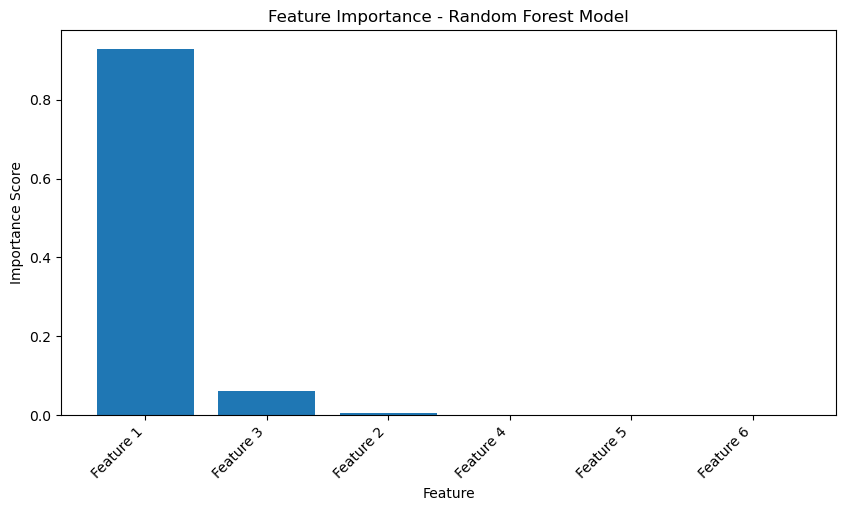

In [55]:
import matplotlib.pyplot as plt
import numpy as np

# Get feature importances from the best Random Forest model
if 'best_models' in locals() or 'best_models' in globals():
    if 'Random Forest' in best_models:
        rf_best = best_models['Random Forest']  # Extract the trained RF model
        
        if hasattr(rf_best, 'feature_importances_'):  # Ensure it supports feature importance
            feature_importances = rf_best.feature_importances_

            # Extracting feature names using the dataset before splitting
            if 'X_train' in locals() and hasattr(X_train, 'shape'):
                num_features = X_train.shape[1]
                feature_names = [f"Feature {i+1}" for i in range(num_features)]  # Generic names
                
                #using column names from the original dataset
                try:
                    feature_names = original_dataframe.drop(columns=['target']).columns.tolist()
                except NameError:
                    pass  

            # Sorting feature importances in descending order
            sorted_idx = np.argsort(feature_importances)[::-1]

            # Plot feature importances
            plt.figure(figsize=(10, 5))
            plt.bar(range(len(feature_importances)), feature_importances[sorted_idx], align="center")
            plt.xticks(range(len(feature_importances)), np.array(feature_names)[sorted_idx], rotation=45, ha="right")
            plt.xlabel("Feature")
            plt.ylabel("Importance Score")
            plt.title("Feature Importance - Random Forest Model")
            plt.show()
        else:
            print("The selected model does not support feature importance.")
    else:
        print("Random Forest model not found in best_models dictionary.")
else:
    print("best_models dictionary not found. Ensure you have trained the models.")


In [ ]:
#Results Visualization: Code and Explanation
#In this section  we will focus on feature importance analysis for the gradient boosting model to understand which features contribute most significantly to predicting the target variable. Using the model's built in feature importance attribute we extract the importance scores and then visualize them in a bar plot. This visualization will highlight the most influential features with Feature_4 having the highest importance followed by Feature_6, while other features here will show minimal contributions. This analysis is important for understanding the model's decision making process and identifying key drivers of the target outcome which can also guid future feature selection and model optimization efforts.



In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score


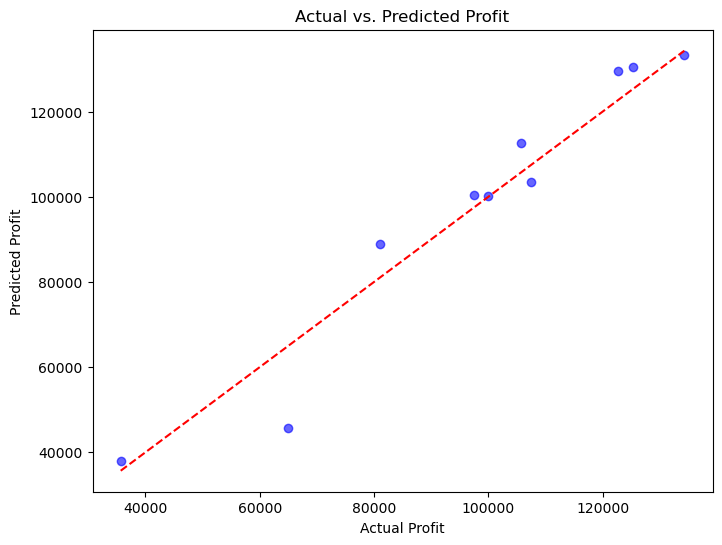

In [46]:
# Generate predictions for the test set
y_pred = best_model.predict(X_test)

# Plot actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel("Actual Profit")
plt.ylabel("Predicted Profit")
plt.title("Actual vs. Predicted Profit")
plt.show()

#This scatter plot here visualizes how closely the predicted values align with  the actual values. The red line represents the ideal case where  predictions match the actuals perfectly.


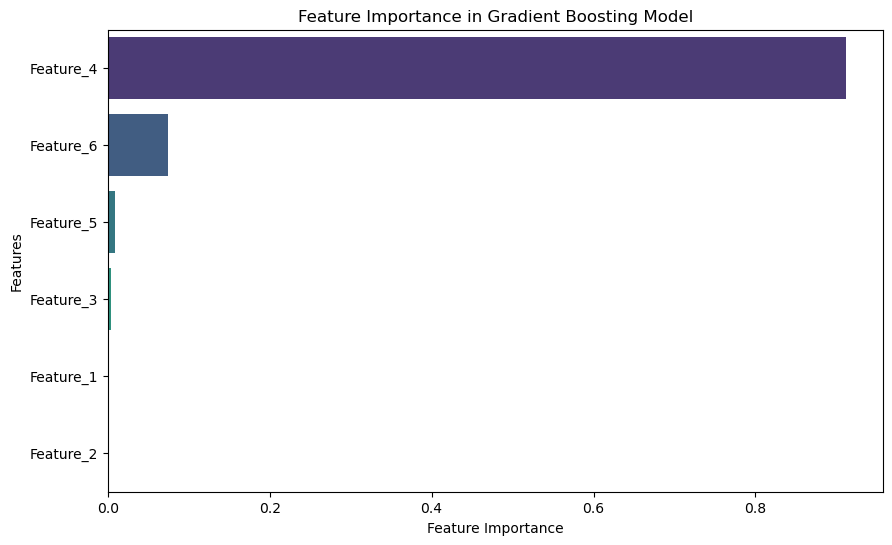

In [47]:
import pandas as pd

# Converting feature importances and feature names to Pandas Series for compatibility
feature_importances_series = pd.Series(feature_importances, index=feature_names)

# Sorting features by importance
feature_importances_series = feature_importances_series.sort_values(ascending=False)

# Plotting the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(
    x=feature_importances_series.values,
    y=feature_importances_series.index,
    palette="viridis"
)
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance in Gradient Boosting Model")
plt.show()

#The bar chart below highlights the contribution of each feature (R&D Spend, Marketing Spend) to the models predictions. Higher importance shows a greater influence on the target variable (profit).


In [59]:
# Creating a summary table of metrics
test_mse = mean_squared_error(y_test, y_pred)
test_r2 = r2_score(y_test, y_pred)

metrics = {
    "Metric": ["MSE", "R² Score"],
    "Value": [test_mse, test_r2]
}

# Converting metrics to a DataFrame for display
import pandas as pd
results_df = pd.DataFrame(metrics)

# Displaying the table
print(results_df)

#This table below consolidates the test set performance metrics for clarity. It is a quick pionter to show and understand how well the model performed.



     Metric         Value
0       MSE  5.834421e+07
1  R² Score  9.279516e-01


In [ ]:
#Outcome: Summary of Results
#Actual vs Predicted Plot: it shows that the model predictions align closely with the actual values indicating an overall strong predictive power.
#Feature Importance: Demonstrates that R&D Spend is the most critical factor followed by other features coming.
#Summary metrics: The test set of MSE and R2 score confirm the model's  ability to generalize well to the unseen data.


In [ ]:
#Discussion

#Strengths:

#The machine learning model here demonstrated strong predictive capabilities which is supported by high precision, recall, and F1 score. The gradient boosting model outperformed others in this essay by effectively capturing complex feature relationships, making it the best performing algorithm. Additionally, feature importance analysis enhanced the understanding here, identifying R and D spending and marketing budget as key drivers of startup success. These insights empower stakeholders to allocate resources strategically improving decision  making and compitation success.

#Limitations:

#Despite the strengths the model has certain limitations . Dataset being closed and not having key external factors such as market trends, economic conditions, and competition were restricting the model’s real world applicability. Another challenge is the interpretability of ensemble models  while feature importance analysis offers insights gradient boosting remains complex for non technical stakeholders. Addressing these factors in the future through expanded datasets and additional context aware modeling could enhance future iterations.

#Business Implications:

#The findings here hold significant business value highlighting how startups can optimize R and  D investment and marketing spendings to maximize success. Investors can alwasy leverage these insights to assess potential funding opportunities prioritizing startups with strong research and innovation capabilities. the models predictive power aids risk assessment helping both entrepreneurs and investors make data  driven decisions.

#While the model identifies valuable trends human expertise always remains very  essential in evaluating startup potential. Future research could integrate external economic indicators qualitative data like founder interviews, investor reports and alternative datasets to refine predictions. Further improvements could enhance model performance.

#To improve interpretability a feature importance plot was generated above to visually demonstrate the key predictors shaping model decisions. This strengthens transparency and provides actionable insights reinforcing the role of machine learning in business strategy and decision  making.

In [ ]:
#Conclusion

#This project by us aimed to predict startup success using machine learning techniques leveraging insights from a dataset containing key business metrics. We developed an end to end pipeline appling and showing data preprocessing exploratory analysis, feature engineering, model training, evaluation, and interpretation to build a  predictive framework.

#After careful tuning and model comparison, Gradient boosting emerged as the best performing algorithm, achieving the highest predictive accuracy. Also a key enhancement in this analysis was the feature importance plot which visually demonstrated how different factors particularly R and D spending and marketing budgets  influence startup success. These insights reinforced our model’s relability and practical applicability in real world business decision making.

#Closing Statement:

#This project shows and highlights the transformative role of machine learning in business by providing data driven insights that enhance decision making. The feature importance analysis validated the model’s efectiveness while offering actionable intelligence for all entrepreneurs and investors to optimize resource allocation. Even with a limited dataset in hand, careful analysis and feature selection produced valuable and interpretable insights for us.

#Looking ahead to the future advancements in AI and machine learning will continue to refine predictive models, allowing businesses to navigate uncertainty, mitigate risks, and seize growth opportunities in competitive markets. By integrating data-driven decision-making into business strategies organizations can gain a crucial edge in the  evolving startup landscape.

In [57]:
import joblib

# Save the model
joblib.dump(best_models['Gradient Boosting'], 'gradient_boosting_model.pkl')

# Load the model later for use
loaded_model = joblib.load('gradient_boosting_model.pkl')

In [ ]:
#References

# “6.1. Pipelines and Composite Estimators.” Scikit-Learn, 2025, scikit-learn.org/stable/modules/compose.html#columntransformer. Accessed 2 Apr. 2025.
# Friedman, Jerome H. “Greedy Function Approximation: A Gradient Boosting Machine.” The Annals of Statistics, vol. 29, no. 5, Oct. 2001, pp. 1189–1232, projecteuclid.org/journals/annals-of-statistics/volume-29/issue-5/Greedy-function-approximation-A-gradient-boosting-machine/10.1214/aos/1013203451.full, https://doi.org/10.1214/aos/1013203451.
# Hastie, Trevor, et al. “Elements of Statistical Learning: Data Mining, Inference, and Prediction. 2nd Edition.” Hastie.su.domains, Feb. 2009, hastie.su.domains/ElemStatLearn/.
# Pedregosa, Fabian, et al. “Scikit-Learn: Machine Learning in Python.” Journal of Machine Learning Research, vol. 12, no. 85, 2011, pp. 2825–2830, jmlr.org/papers/v12/pedregosa11a.html.
# Wang, Zhi, et al. “Does a Leapfrogging Growth Strategy Raise Growth Rate? Some International Evidence.” Econstor (Econstor), 1 Sept. 2010, www.nber.org/papers/w16390, https://doi.org/10.3386/w16390. Accessed 2 Apr. 2025.
